In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
%matplotlib inline

## Parameters

In [3]:
pi = 3.1415
k=2.46 #E_C
x_min = -3*pi
x_max =  3*pi
N = 1000 #число отрезков  на интервале
x = np.linspace(x_min, x_max, N) #точки вычисления

# Def potential

In [4]:
def U_fl(x,pi):
    a = 0.545 # Е_L
    b = 10.2 # E_J b>0
    c = 0
    u = (1/2)*a*(x**2)-b*np.cos(x-2*pi*c)
    return u

In [5]:
U = U_fl(x,pi)

## Plot potential

In [6]:
def plot_pot(U,x):    
    fig, ax = plt.subplots()
    ax.plot(x, U)

    ax.set_ylim(min(U)-10, max(U)+10)
    ax.set_xlabel(r'$x$', fontsize=18)
    ax.set_ylabel(r'$U(x)$', fontsize=18);

In [7]:
plot_pot(U,x)

### Matrix flux representation of the energy  

In [8]:
def mod_kron(N, n, m):
    return (n == m)

In [9]:
def assemble_K(N, k, x_min, x_max):
    dx = (x_min - x_max) / N

    K = np.zeros((N, N)).astype(np.complex)

    for m in range(0, N):
        for n in range(0, N):
            K[m, n] = (-4)*k / (dx ** 2) * (mod_kron(N, m + 1, n) - 2 * mod_kron(N, m, n) + mod_kron(N, m - 1, n))
                # помнить, что тут -К 
    return K

In [10]:
def assemble_V(N, u, x_min, x_max, sparse=False):
    V = np.zeros((N, N)).astype(np.complex)
    for m in range(N):
        for n in range(N):
            V[m, n] = u[m] * mod_kron(N, m, n)
    return V

In [11]:
K = assemble_K(N, k, x_min, x_max)
V = assemble_V(N, U, x_min, x_max)
H = K + V #наш гамильтониан системы

In [24]:
# (N/(x_max-x_min))**2*4*k*2 
# """элементы матрицы кин.энергии по диагонали """

## Matrix charge representation of the energy  

## Eigenvalues

In [12]:
def solve_eig(H):
    vals, vecs = np.linalg.eig(H)
    idx = np.real(vals).argsort()
    vals = vals[idx]
    vecs = vecs.T[idx]
    return vals, vecs

In [13]:
evals, evecs = solve_eig(H)

In [27]:
# Anharmonicity
Num = 20
a = np.zeros(Num-1,dtype = complex)
for i in range(Num-1) :
    a[i]=evals[i+1]-evals[i]
a.real

array([  9.72284521,   0.15506931,   1.93240704,   6.66786637,
         2.54957231,   3.48520293,   5.0588389 ,   4.78743978,
         5.27244751,   5.78963359,   6.22162078,   6.74956492,
         7.29329952,   7.84210895,   8.3965397 ,   8.95026176,
         9.50263499,  10.05367933,  10.6034522 ])

In [28]:
Number_evals = 20
evals[0:Number_evals].real

array([  -3.56619336,    6.15665186,    6.31172117,    8.2441282 ,
         14.91199458,   17.46156688,   20.94676982,   26.00560871,
         30.79304849,   36.065496  ,   41.85512959,   48.07675037,
         54.82631529,   62.11961481,   69.96172376,   78.35826346,
         87.30852522,   96.81116021,  106.86483954,  117.46829173])

In [29]:
num = sum(evals<0) #число состояний с Е<0
num

1

In [30]:
evals[:num].real

array([-3.56619336])

### Normalize wavefunction

In [31]:
NN = 20 #number of wavefunction

In [32]:
def wavefunction_normalize(psi):
    Norm = (psi.conj()* psi).sum()
    return psi / np.sqrt(Norm)

In [33]:
psi = np.zeros((N, N)).astype(np.complex)
for m in range(N):
    psi[m]= wavefunction_normalize( evecs[m])

In [34]:
Norm = (psi[2].conj() * psi[2]).sum()
Norm

(1+0j)

## Plot wave function

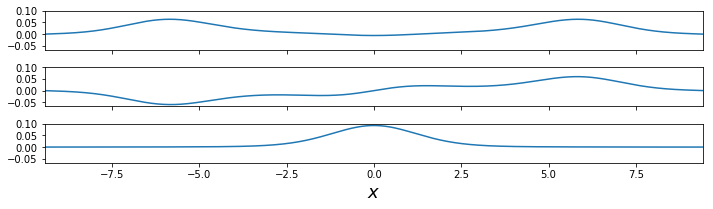

In [35]:
NN = 3
fig, axes = plt.subplots(NN, 1, figsize=(10,NN*1), sharex=True, sharey=True)
for n in range(NN):
    Y = psi[NN-n-1]
    axes[n].plot(x, Y.real)
axes[n].set_xlim(x_min,x_max)
axes[n].set_xlabel(r'$x$', fontsize=18)
# axes[n].set_ylabel(r'evals[n].real',fontsize = 10)
fig.tight_layout();

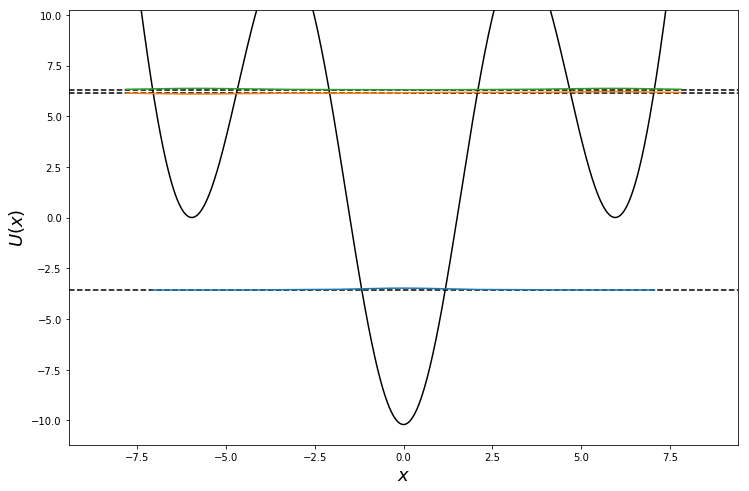

In [36]:
NN=3
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, U, 'k')
for n in range(NN):
    Y = evals[n] + psi[n]

       
    ax.plot(x, evals[n].real * np.ones(np.shape(x)), 'k--')
    
    mask = np.where(Y > U-10)
    ax.plot(x[mask], Y[mask].real)
    
ax.set_xlim(x_min, x_max)
ax.set_ylim(min(U)-1, evals[NN].real+2)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$U(x)$', fontsize=18);

## Plot wave function ^2

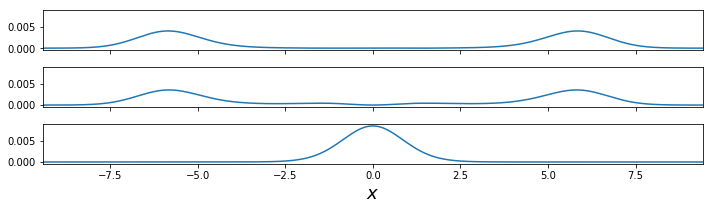

In [37]:
fig, axes = plt.subplots(NN, 1, figsize=(10,NN*1), sharex=True, sharey=True)
for n in range(NN):
    Y = psi[NN-n-1]*psi[NN-n-1].conj()  #вывод psi^2
    axes[n].plot(x, Y.real)
axes[n].set_xlim(x_min,x_max)
axes[n].set_xlabel(r'$x$', fontsize=18)
fig.tight_layout();

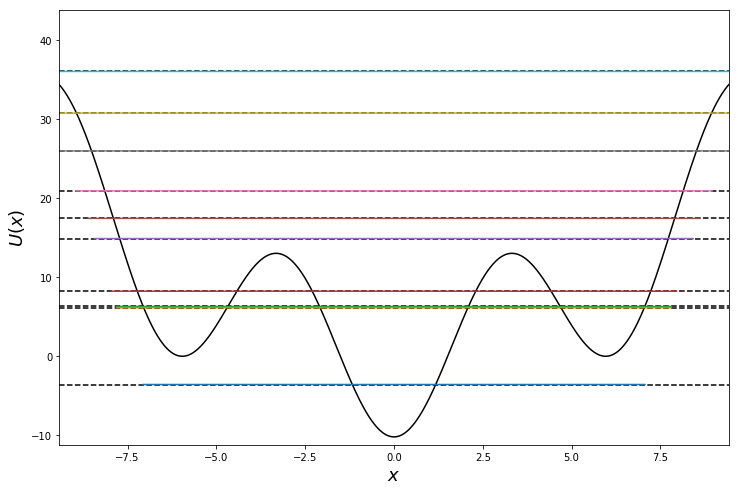

In [38]:
NN=10
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, U, 'k')
for n in range(NN):
    Y = evals[n] + psi[n]*psi[n].conj()

       
    ax.plot(x, evals[n].real * np.ones(np.shape(x)), 'k--')
    
    mask = np.where(Y > U-10)
    ax.plot(x[mask], Y[mask].real)
    
ax.set_xlim(x_min, x_max)
ax.set_ylim(min(U)-1, evals[NN].real+2)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$U(x)$', fontsize=18);

## Coupling constant 

In [39]:
def assemble_D(N, k, x_min, x_max):
    dx = (x_min - x_max) / N

    K = np.zeros((N, N)).astype(np.complex)

    for m in range(0, N):
        for n in range(0, N):
            K[m, n] = (mod_kron(N, m, n) - mod_kron(N, m-1, n))/dx
    return K

In [40]:
D = assemble_D(N, k, x_min, x_max)
Nk=10
for i in range(Nk) :
    print(i,(psi[0].real)@((D.real)@(psi[i].real)))

0 -0.0028272493516
1 -0.183213817978
2 0.00063286293599
3 0.502053958739
4 0.00307229424091
5 -0.0985446088061
6 0.00250485813059
7 -0.0617660908473
8 -0.00134738266122
9 0.0263213848886


In [42]:
pi=3.1415
Z=110
w=2*pi*8.131*10**(9)
Lr=Z/w
Cr=1/(Z*w)

In [43]:
Lr

2.1531865800962997e-09

In [44]:
Cr

1.7794930414019004e-13

In [45]:
Fpi=3*10**(-16)
e=1.6*10**(-19)
h=6.626*10**(-34)
El=h*0.892*10**9
Ej=h*12*10**9
Ec=h*2.57*10**9
Cj=e**2/2/Ec
Lj=Fpi**2/Ej
La=Fpi**2/El
Cc=0.6*10**(-15)

In [46]:
Cj

7.516668800304427e-15

In [47]:
Lj

1.1319046181708421e-08

In [48]:
La

1.522741638794855e-07

In [49]:
Csig=Cr*Cj+Cr*Cc+Cj*Cc
wr=np.sqrt((Cj+Cc)/(Lr*Csig))
Zc=np.sqrt(Lr*(Cj+Cc)/Csig)
g=2*e*Cc*np.sqrt(h/(2*pi)/(2*Zc))/Csig

In [50]:
g/h*10**(-9)

0.13857696469373257

In [51]:
wr/10**(-9)

5.1007499591690994e+19

In [52]:
Csig

1.4488655662307465e-27

In [53]:
Cr*(Cj+Cc)

1.444355564950564e-27

In [54]:
Zc

109.82866360509652

In [55]:
gx=g/h*10**(-9)*0.22

In [56]:
gx

0.030486932232621167

In [67]:
g=2*e*Cc/(Cj+Cc)*np.sqrt(h*w/(Cr*4*pi))/10**(9)

In [69]:
g/h

0.14762531426196132